In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

In [2]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':5, 'smooth_scale_1D':5, 'boundary_correction_order':0}

In [32]:
n_cut=18000
probe='WLxN'
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_true_no_shear_richness_cov = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Without Cov($\Delta\Sigma,\lambda$) correction')


name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_true = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'With Cov($\Delta\Sigma,\lambda$) correction')
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_bpz = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'BPZ + Cov($\Delta\Sigma,\lambda$)')

name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_flex = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'FlexZBoost + Cov($\Delta\Sigma,\lambda$)')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [33]:
name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_bpz_lensing_bias = MCSamples(samples=t['flat_chains'][n_cut:],names = names + ['7'], 
                    labels = labels + ['b'], 
                     settings=settings, 
                     label='BPZ + Cov (1+b)')

name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5+cov(g,richness)_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/{probe}/MCMC_fit_m-r_{probe}_{name}.pkl', allow_pickle = True)
WL_flex_lensing_bias = MCSamples(samples=t['flat_chains'][n_cut:],names = names+ ['7'], 
                    labels = labels+ ['b'], 
                     settings=settings, 
                     label='FlexZBoost + Cov (1+b)')

Removed no burn in
Removed no burn in


In [34]:
params_fid=[3.345953364933381,
 0.06378674560099672,
 2.2274595352385975,
 0.5634900828247924,
 -0.04529427946062734,
 0.09764409931399064]

In [35]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

In [36]:
markers

{'1': 3.345953364933381,
 '2': 0.06378674560099672,
 '3': 2.2274595352385975,
 '4': 0.5634900828247924,
 '5': -0.04529427946062734,
 '6': 0.09764409931399064}

In [40]:
#g = plots.get_subplot_plotter(subplot_size=1)
#g.settings.lab_fontsize = 20
#g.settings.legend_fontsize = 15
#g.settings.figure_legend_ncol = 2
#g.settings.axes_fontsize = 13
#marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[3.1,3.6], '2':[-0.25,0.45], '3':[1.8,2.6], '4':[0.4,0.7],'5':[-0.6,0.6], '6':[-0.1,0.4]}
#g.triangle_plot(
#                [WL_true_no_shear_richness_cov, WL_true, ], 
#                filled=[True, False, False, False, False], 
#                shaded=False, 
#                contour_colors = ['C0', 'b', 'r', 'orange' ], 
#                contour_ls=['-','--','--', '-', '-'],
#                contour_lws=[1.2,1.5,1.2,1,2],
#                legend_fontsize = 10,
#                #param_limits=range_,
#                params=['1','2','3','4','5','6',],
#                markers=markers,marker_args=marker_args,
#                fine_bins = 1, 
#                upper_roots = [WL_bpz, WL_bpz_lensing_bias, WL_flex,  WL_flex_lensing_bias],
#                upper_kwargs = { 'filled':[True, False, True, False],
#                                'shaded':False,  'contour_lws':[1.2,1.2,1.2,1.2],
#                    'contour_colors':['red','darkred','limegreen', 'forestgreen'], 
#                                'contour_ls':['-',':','-','-']}
#)
#plt.savefig(f'../fig/impact_shear_richness_cov.png', dpi = 300, bbox_inches='tight',)

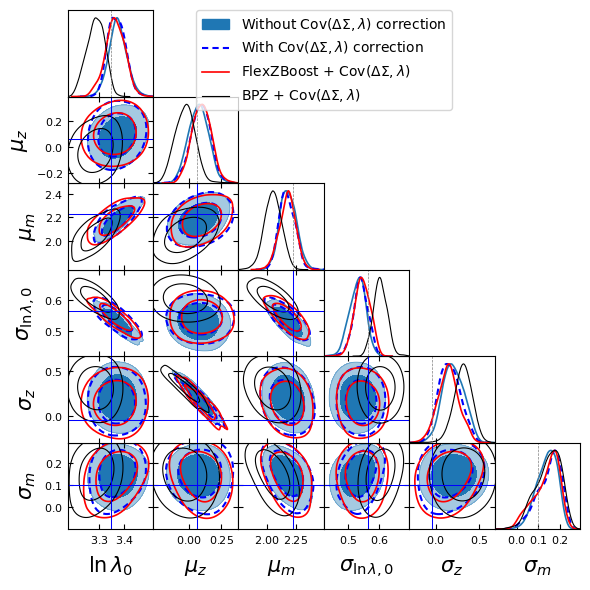

In [44]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.figure_legend_ncol = 1
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'-','color':'b'}
range_ = {'1':[3.1,3.6], '2':[-0.25,0.45], '3':[1.8,2.6], '4':[0.4,0.7],'5':[-0.6,0.6], '6':[-0.1,0.4]}
g.triangle_plot(
                [WL_true_no_shear_richness_cov, WL_true, WL_flex, WL_bpz], 
                filled=[True, False, False, False, False], 
                shaded=False, 
                contour_colors = ['C0', 'b', 'red', 'k' ], 
                contour_ls=['-','--','-', '-', '-'],
                contour_lws=[1.2,1.5,1.2,0.8],
                legend_fontsize = 10,
                #param_limits=range_,
                params=['1','2','3','4','5','6',],
                markers=markers,marker_args=marker_args,
                fine_bins = 1, 
)
plt.savefig(f'../fig/impact_shear_richness_cov_1.png', dpi = 300, bbox_inches='tight',)

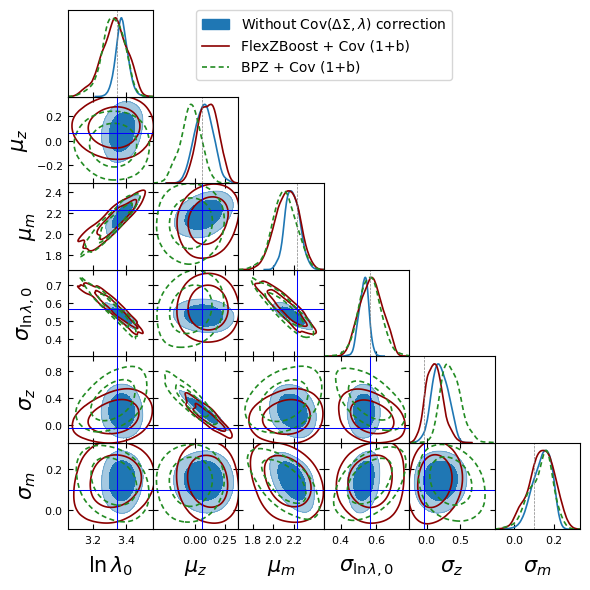

In [42]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.figure_legend_ncol = 1
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'-','color':'b'}
range_ = {'1':[3.1,3.6], '2':[-0.25,0.45], '3':[1.8,2.6], '4':[0.4,0.7],'5':[-0.6,0.6], '6':[-0.1,0.4]}
g.triangle_plot(
                [WL_true_no_shear_richness_cov, WL_flex_lensing_bias, WL_bpz_lensing_bias], 
                filled=[True, False, False, False], 
                shaded=False, 
                contour_colors = ['C0','darkred', 'forestgreen'], 
                contour_ls=['-','-','--','-'],
                contour_lws=[1.2,1.2,1.2,1.2],
                legend_fontsize = 10,
                #param_limits=range_,
                params=['1','2','3','4','5','6',],
                markers=markers,marker_args=marker_args,
                fine_bins = 1, 
)
plt.savefig(f'../fig/impact_shear_richness_cov_2.png', dpi = 300, bbox_inches='tight',)